In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Integral Cuadratura Gauss-Legendre

$$\int_{-1}^{1} f(x)dx\approx\sum_{i=0}^{n-1} w_i f(x_i)$$

Donde $x_i$ son los ceros del $\textbf{Polinomio de Legendre}$ $P_n(x)$ de grado $n$ y $w_i$ son los pesos definidos como:

$$w_i=\frac{2}{(1-x_i^2)[P_n'(x_i)]^2}$$

In [2]:
#Calculamos zeros y pesos
def legendre_xw(n):
    x = Symbol("x")
    print('n:',n)

    polinomio=legendre(n,x)
    derivada=diff(polinomio,x)
    print('Pn(x):',polinomio)
    print('dPn(x):',derivada)

    roots = Poly(polinomio).all_roots()
    xi=np.zeros(n)
    wi=np.zeros(n)

    for i in range(n):    
        xi[i]=roots[i].evalf()
        der=derivada.subs(x,xi[i])
        wi[i]=(2)/((1-xi[i]**2)*der**2)

    print('xi:',xi)
    print('wi:',wi)
    
    return xi,wi

# Ejemplos

$$\int_{-1}^{1} \sin(x) dx = 0$$

$$\int_{-1}^{1} \cos(x) dx = 2\sin(1) \approx 1.68294$$

In [3]:
n=4
xi,wi=legendre_xw(n)

def f(x):
    return np.sin(x)

def g(x):
    return np.cos(x)

Int1=sum(wi*f(xi))
Int2=sum(wi*g(xi))

print('----------------------')

print('Integral Seno:',Int1)
print('Integral Coseno:',Int2)

n: 4
Pn(x): 35*x**4/8 - 15*x**2/4 + 3/8
dPn(x): 35*x**3/2 - 15*x/2
xi: [-0.86113631 -0.33998104  0.33998104  0.86113631]
wi: [0.34785485 0.65214515 0.65214515 0.34785485]
----------------------
Integral Seno: 0.0
Integral Coseno: 1.6829416886959736


# Integrales entre [a,b]

$$x=\frac{b-a}{2}t+\frac{b+a}{2}$$

$$dx=\frac{b-a}{2}dt$$

$$\int_{a}^{b} f(x) dx = \frac{b-a}{2} \int_{-1}^{1}f(\frac{b-a}{2}t+\frac{b+a}{2})dt= \int_{-1}^{1}g(t)dt$$

con $$g(t)=\frac{b-a}{2}f(\frac{b-a}{2}t+\frac{b+a}{2})$$

El valor de la integral:

$$\int_{a}^{b} f(x) dx \approx \sum_{i=0}^{n-1}w_i g(t_i)=\frac{b-a}{2}\sum_{i=0}^{n-1}w_i f(\frac{b-a}{2}t_i+\frac{b+a}{2})$$

# Ejemplo

$$\int_0^{\pi/2} \cos(x)dx=1$$

In [4]:
a=0
b=np.pi/2

n=4
ti,wi=legendre_xw(n)

def f(x):
    return np.cos(x)

def g(t):
    evalt=(b-a)*t+(b+a)
    return f(evalt/2)*(b-a)/(2)

Int=sum(wi*g(ti))

print('----------------------')

print('Integral Coseno:',Int)

n: 4
Pn(x): 35*x**4/8 - 15*x**2/4 + 3/8
dPn(x): 35*x**3/2 - 15*x/2
xi: [-0.86113631 -0.33998104  0.33998104  0.86113631]
wi: [0.34785485 0.65214515 0.65214515 0.34785485]
----------------------
Integral Coseno: 0.9999999771971154


In [5]:
#Calculamos zeros y pesos
def legendre_xw(n):
    x = Symbol("x")
    #print('n:',n)

    polinomio=legendre(n,x)
    derivada=diff(polinomio,x)
    #print('Pn(x):',polinomio)
    #print('dPn(x):',derivada)

    roots = Poly(polinomio).all_roots()
    xi=np.zeros(n)
    wi=np.zeros(n)

    for i in range(n):    
        xi[i]=roots[i].evalf()
        der=derivada.subs(x,xi[i])
        wi[i]=(2)/((1-xi[i]**2)*der**2)

    #print('xi:',xi)
    #print('wi:',wi)
    
    return xi,wi

# Errores 

### Integral Seno

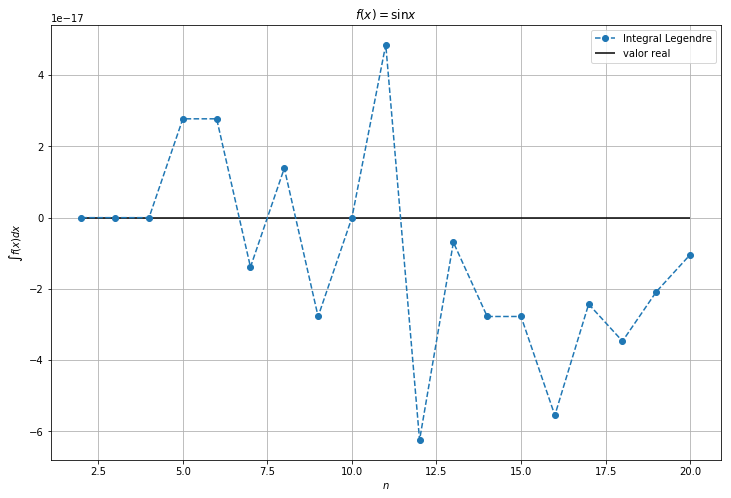

In [6]:
def f(x):
    return np.sin(x)

valorreal=0

nmax=20
n=np.arange(2,nmax+1,1)
Int=np.zeros(len(n))

for i in range(len(n)):
    xi,wi=legendre_xw(n[i])
    Int[i]=sum(wi*f(xi))

plt.figure(figsize=(2*6,2*4))
plt.title('$f(x)=\sin{x}$')
plt.plot(n,Int,'o--',label='Integral Legendre')
plt.hlines(valorreal,2,nmax,label='valor real')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$\int f(x)dx$')
plt.legend(loc=1)

# En la gráfica anterior note el orden de magnitud del eje y


### Error Coseno:

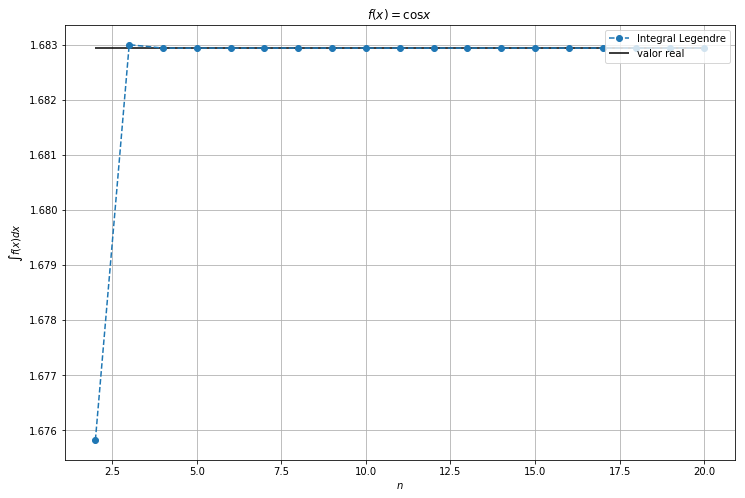

In [7]:
def f(x):
    return np.cos(x)

valorreal=2*np.sin(1)

nmax=20
n=np.arange(2,nmax+1,1)
Int=np.zeros(len(n))

for i in range(len(n)):
    xi,wi=legendre_xw(n[i])
    Int[i]=sum(wi*f(xi))

plt.figure(figsize=(2*6,2*4))
plt.title('$f(x)=\cos{x}$')
plt.plot(n,Int,'o--',label='Integral Legendre')
plt.hlines(valorreal,2,nmax,label='valor real')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$\int f(x)dx$')
plt.legend(loc=1)

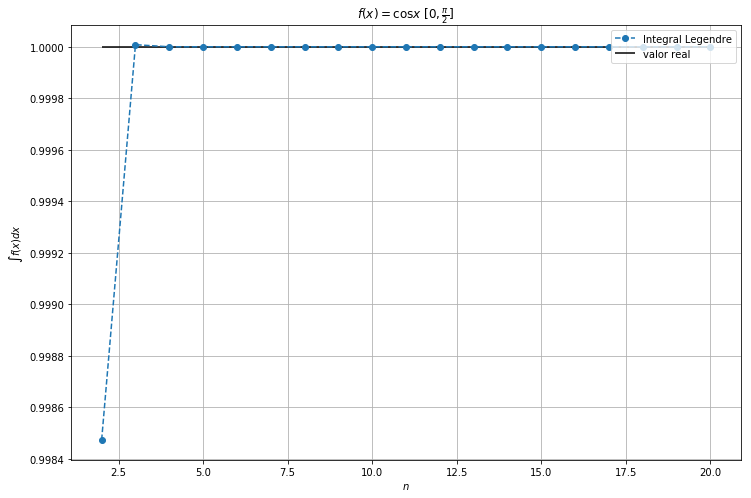

In [8]:
def f(x):
    return np.cos(x)
a=0
b=np.pi/2

def g(t):
    evalt=(b-a)*t+(b+a)
    return f(evalt/2)*(b-a)/(2)

valorreal=1

nmax=20
n=np.arange(2,nmax+1,1)
Int=np.zeros(len(n))

for i in range(len(n)):
    ti,wi=legendre_xw(n[i])
    Int[i]=sum(wi*g(ti))

plt.figure(figsize=(2*6,2*4))
plt.title('$f(x)=\cos{x}$ $[0,\\frac{\pi}{2}]$')
plt.plot(n,Int,'o--',label='Integral Legendre')
plt.hlines(valorreal,2,nmax,label='valor real')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$\int f(x)dx$')
plt.legend(loc=1)

# Cuadratura Gauss-Laguerre

$$\int_0^{\infty} e^{-x} f(x) dx = \sum_{i=0}^{n-1} w_i f(x_i)$$

Donde $x_i$ son los ceros del $\textbf{Polinomio de Laguerre}$ $L_n(x)$ de grado $n$ y $w_i$ son los pesos definidos como:

$$w_i=\frac{x_i}{(n+1)^2[L_{n+1}(x_i)]^2}$$

In [9]:
#Calculamos zeros y pesos
def laguerre_xw(n):
    x = Symbol("x")
    print('n:',n)

    polinomio=laguerre(n,x)
    print('Pn(x):',polinomio)

    roots = Poly(polinomio).all_roots()
    xi=np.zeros(n)
    wi=np.zeros(n)

    for i in range(n):    
        xi[i]=roots[i].evalf()
        wi[i]=(xi[i])/(((n+1)*laguerre(n+1,xi[i]))**2)
        
    print('xi:',xi)
    print('wi:',wi)
    
    return xi,wi

# Ejemplo

$$\int_0^\infty e^{-x^2}dx=\frac{\sqrt{\pi}}{2}\approx0.886227$$

#### Solucion
$$\int_0^\infty e^{-x^2}dx=\int_0^\infty e^{-x}e^{x}e^{-x^2}dx=\sum_{i=0}^n w_i g(x_i)$$

con $g(x)=e^{x}e^{-x^2}$


In [10]:
n=10
xi,wi=laguerre_xw(n)

def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(x)*f(x)

Int1=sum(wi*g(xi))

print('----------------------')

print('Integral:',Int1)


n: 10
Pn(x): x**10/3628800 - x**9/36288 + x**8/896 - x**7/42 + 7*x**6/24 - 21*x**5/10 + 35*x**4/4 - 20*x**3 + 45*x**2/2 - 10*x + 1
xi: [ 0.13779347  0.72945455  1.8083429   3.4014337   5.55249614  8.33015275
 11.84378584 16.27925783 21.99658581 29.92069701]
wi: [3.08441116e-01 4.01119929e-01 2.18068288e-01 6.20874561e-02
 9.50151698e-03 7.53008389e-04 2.82592335e-05 4.24931398e-07
 1.83956482e-09 9.91182722e-13]
----------------------
Integral: 0.8865560999061817


# Ejemplo

$$\int_0^\infty \frac{\sin(x)}{x}dx=\frac{\pi}{2}$$

#### Solucion
$$\int_0^\infty \frac{\sin(x)}{x}dx=\int_0^\infty e^{-x}e^{x}\frac{\sin(x)}{x}dx=\sum_{i=0}^n w_i g(x_i)$$

con $g(x)=e^{x}\frac{\sin(x)}{x}$


In [11]:
n=10
xi,wi=laguerre_xw(n)

def f(x):
    return np.sin(x)/x

def g(x):
    return np.exp(x)*f(x)

Int1=sum(wi*g(xi))

print('----------------------')

print('Integral:',Int1)

n: 10
Pn(x): x**10/3628800 - x**9/36288 + x**8/896 - x**7/42 + 7*x**6/24 - 21*x**5/10 + 35*x**4/4 - 20*x**3 + 45*x**2/2 - 10*x + 1
xi: [ 0.13779347  0.72945455  1.8083429   3.4014337   5.55249614  8.33015275
 11.84378584 16.27925783 21.99658581 29.92069701]
wi: [3.08441116e-01 4.01119929e-01 2.18068288e-01 6.20874561e-02
 9.50151698e-03 7.53008389e-04 2.82592335e-05 4.24931398e-07
 1.83956482e-09 9.91182722e-13]
----------------------
Integral: 1.0126634840756146


In [12]:
#Quitamos los prints
def laguerre_xw(n):
    x = Symbol("x")
#    print('n:',n)

    polinomio=laguerre(n,x)
 #   print('Pn(x):',polinomio)

    roots = Poly(polinomio).all_roots()
    xi=np.zeros(n)
    wi=np.zeros(n)

    for i in range(n):    
        xi[i]=roots[i].evalf()
        wi[i]=(xi[i])/(((n+1)*laguerre(n+1,xi[i]))**2)
        
  #  print('xi:',xi)
   # print('wi:',wi)
    
    return xi,wi

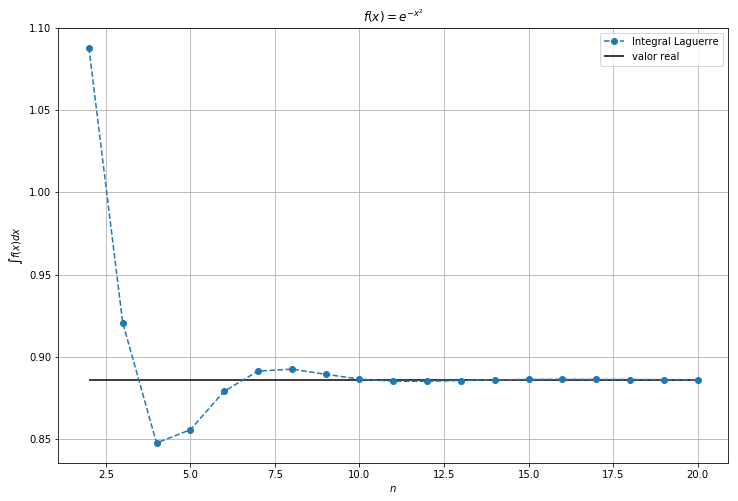

In [13]:
def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(x)*f(x)

valorreal=np.sqrt(np.pi)/2

nmax=20
n=np.arange(2,nmax+1,1)
Int=np.zeros(len(n))

for i in range(len(n)):
    xi,wi=laguerre_xw(n[i])
    Int[i]=sum(wi*g(xi))

plt.figure(figsize=(2*6,2*4))
plt.title('$f(x)=e^{-x^2}$')
plt.plot(n,Int,'o--',label='Integral Laguerre')
plt.hlines(valorreal,2,nmax,label='valor real')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$\int f(x)dx$')
plt.legend(loc=1)

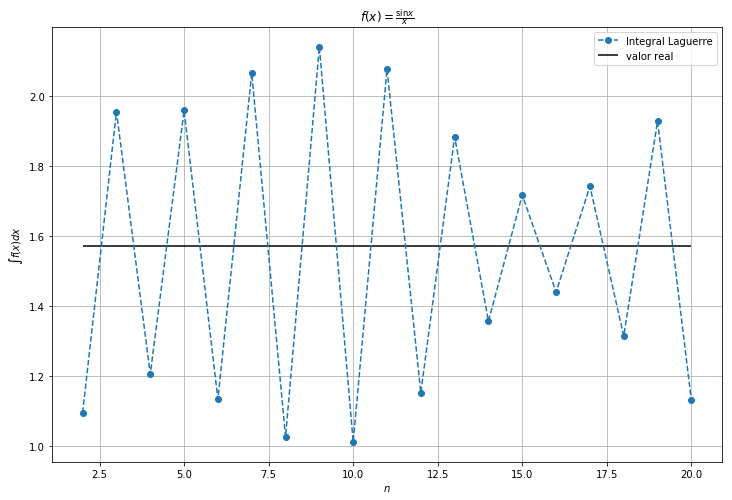

In [14]:
def f(x):
    return np.sin(x)/x

def g(x):
    return np.exp(x)*f(x)

valorreal=np.pi/2

nmax=20
n=np.arange(2,nmax+1,1)
Int=np.zeros(len(n))

for i in range(len(n)):
    xi,wi=laguerre_xw(n[i])
    Int[i]=sum(wi*g(xi))

plt.figure(figsize=(2*6,2*4))
plt.title('$f(x)=\\frac{\sinx}{x}$')
plt.plot(n,Int,'o--',label='Integral Laguerre')
plt.hlines(valorreal,2,nmax,label='valor real')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$\int f(x)dx$')
plt.legend(loc=1)

# La gráfica anterior se muestra el problema de estabilidad que posee el cambio de función $f(x)=\frac{\sin{x}}{x}\to g(x)=e^{x}\frac{\sin{x}}{x}$ bajo una integral por cuadratura de Laguerre

# Otras cuadraturas:

El resto de cuadraturas se pueden programar de forma similar usando sympy para encontrar los ceros de los polinomios y la forma de la integral


$$\begin{bmatrix}
\text{Polinomios} & & \text{Integral} & & \text{Pesos}\\
\\
\text{Legendre} & & \int_{-1}^{1} dx f(x) & & \omega_i=\frac{2}{(1-x_i^2)[P_n'(x_i)]^2}\\
\\
\text{Laguerre} & & \int_{0}^{\infty} dx e^{-x}f(x) & & \omega_i = \frac{x_i}{(n+1)^2[L_{n+1}(x_i)]^2} \\
\\
\text{Hermite} & & \int_{-\infty}^{\infty} dx e^{-x^2}f(x) & &\omega_i=\frac{2^{n-1}n!\sqrt{\pi}}{n^2[H_{n-1}(x_i)]^2}\\
\\
\text{Chebyshev Tipo 1} & & \int_{-1}^{1} dx \frac{1}{\sqrt{1-x^2}}f(x) & & \omega_i=\frac{\pi}{n}\\
\\
\text{Chebyshev Tipo 2} & & \int_{-1}^{1} dx \sqrt{1-x^2}f(x) & & \omega_i=\frac{\pi}{n+1}\sin^2\left(\frac{i}{n+1}\pi\right)\\
\end{bmatrix}$$

# En general:

Las integrales por cuadraturas especiales tienen la forma 

$$I_n=\sum_{i=0}^{n-1} \omega_i f(x_i)$$

donde $n$ es el número de puntos tomados para la cuadratura y $x_i$ es la raiz $i$-esima del polinomio especial $P_n(x)$ de grado $n$

Para más información visitar el link https://en.wikipedia.org/wiki/Gaussian_quadrature#Other_forms

In [22]:
#Algunas funciones de Sympy para polinomios especiales

n=2
x = Symbol("x")
print('n:',n)
print('Legendre:',legendre(n,x))
print('Laguerre:',laguerre(n,x))
print('Hermite:',hermite(n,x))
print('Chebyshev Tipo 1 (T):',chebyshevt_poly(n,x))
print('Chebyshev Tipo 2 (U):',chebyshevu_poly(n,x))

print('-----------------')
print('Raices:')
print('Legendre:',Poly(legendre(n,x)).all_roots())
print('Laguerre:',Poly(laguerre(n,x)).all_roots())
print('Hermite:',Poly(hermite(n,x)).all_roots())
print('Chebyshev Tipo 1 (T):',Poly(chebyshevt(n,x)).all_roots())
print('Chevyshev Tipo 2 (U):',Poly(chebyshevu(n,x)).all_roots())


print('-----------------')
print('Evaluación floats para las raices')
print('Ejemplo Laguerre:')
roots=Poly(laguerre(n,x)).all_roots()
print(roots)
print('Evaluados:')
for i in range(n):
    roots[i]=roots[i].evalf()
print(roots)

n: 2
Legendre: 3*x**2/2 - 1/2
Laguerre: x**2/2 - 2*x + 1
Hermite: 4*x**2 - 2
Chebyshev Tipo 1 (T): 2*x**2 - 1
Chebyshev Tipo 2 (U): 4*x**2 - 1
-----------------
Raices:
Legendre: [-sqrt(3)/3, sqrt(3)/3]
Laguerre: [-sqrt(2) + 2, sqrt(2) + 2]
Hermite: [-sqrt(2)/2, sqrt(2)/2]
Chebyshev Tipo 1 (T): [-sqrt(2)/2, sqrt(2)/2]
Chevyshev Tipo 2 (U): [-1/2, 1/2]
-----------------
Evaluación floats para las raices
Ejemplo Laguerre:
[-sqrt(2) + 2, sqrt(2) + 2]
Evaluados:
[0.585786437626905, 3.41421356237309]
